In [1]:
%pip install pandas numpy matplotlib scipy scikit-learn statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Goals

- Map the locations of jobs by location
- Measure distribution of industry and salaries
- Measure distribution of job postings by time
- Find correlations between variables
    - Location vs salary
    - Title vs salary
    - views vs salary
    - time vs salary
    - description length vs views
    - applications vs location
    - views vs location
    - views vs applications
- Predict number of applications
- Predict salary

# Getting the data

In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/xanderios/linkedin-job-postings/job_postings.csv")

df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


# Basic data cleaning

- Drop job and company IDs
- Drop posting_domain, application_url, job_posting_url

In [4]:
df = df.drop(columns=['job_id', 'company_id', 'posting_domain', 'application_url', 'job_posting_url'])

Text(0.5, 1.0, 'Frequency of job types')

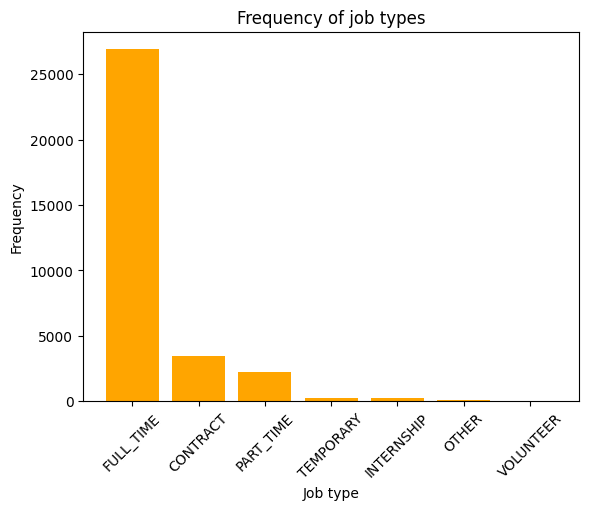

In [23]:
import matplotlib.pyplot as plt

distribution = df['work_type'].value_counts()

plt.bar(distribution.keys(), distribution.values, color="orange")
plt.xticks(rotation=45)
plt.xlabel("Job type")
plt.ylabel("Frequency")
plt.title("Frequency of job types")